In [30]:
import numpy as np
from geometry import centroid, conjugate, translate, intersects, complex2cart, PSI, PSI2, Polygon

from penrose import RobinsonTriangle, FatRhombus, ThinRhombus, remove_dupes, make_svg, write_svg, create_tiling
from penrose import inflate, find_minmax, is_in_box, create_penrose_rhombus
import cv2
from pathlib import Path
from matplotlib import pyplot as plt
%reload_ext autoreload
%autoreload 2

In [31]:
from IPython.display import SVG, display
def show_svg(path:Path):
    display(SVG(path))

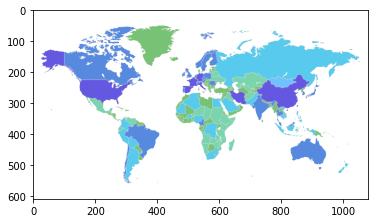

In [32]:
image = cv2.imread("map.png", cv2.IMREAD_UNCHANGED)
plt.imshow(image)
plt.show()

In [33]:
tile_scale = np.pi
# scale = np.max(image.shape) * tile_scale
side_length = 90
N = 10

tri = create_penrose_rhombus(side_length, shape=FatRhombus)

ix = intersects(tri, Polygon((0j,0+10j, 10 + 0j)))
print(ix)

tiling = create_tiling(tri, N)

False


In [34]:
# stroke_width = str(PSI**N * scale * 0.1)

# Make svg
svg = make_svg(
    tiling,
    stroke_width=0.1
)
write_svg(svg, Path("all_tiles.svg"))
# show_svg(Path("all_tiles.svg"))

In [35]:
# Translate tiles to be centered around the image's origin
amount = image.shape[1]/2.0 + 1j * image.shape[0]/2.0
shift_tiles = [translate(t, amount) for t in tiling]
minx, maxx, miny, maxy = find_minmax(shift_tiles)
# print(minx, maxx, miny, maxy)

145


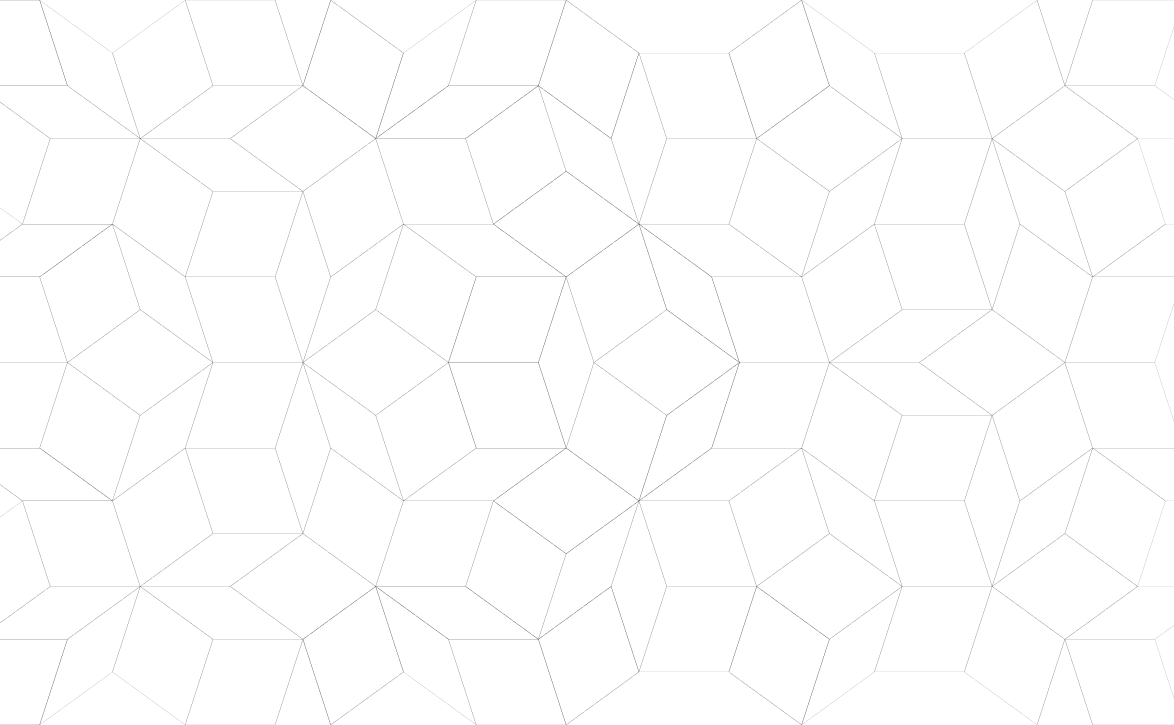

In [36]:
# Remove all tiles not inside the image boundary.
margin = 1.01
xbound = tuple((0, image.shape[1]))
ybound = tuple((0, image.shape[0]))

# bounds = [
#     (0+0j, image.shape[1] + 0j),
#     (image.shape[1] + 0j, image.shape[1] + 1j*image.shape[0]),
#     (image.shape[1] + 1j*image.shape[0], 0 + 1j * image.shape[0]),
#     (0 + 1j * image.shape[0], 0 + 0j),
# ]
bounds = Polygon((0j, image.shape[1] + 0j, image.shape[1] + 1j*image.shape[0], 0 + 1j*image.shape[0]))

# Tiles that intersect or have a centroid within a box are valid
valid_tiles = list(filter(lambda t: intersects(t, bounds) or is_in_box(t, (0,image.shape[1]), (0,image.shape[0])), shift_tiles))
print(len(valid_tiles))
svg = make_svg(
    valid_tiles,
    stroke_width=0.1
)
write_svg(svg, Path("map_tiles.svg"))
show_svg(Path("map_tiles.svg"))

In [37]:
tile = valid_tiles[20]
pts = np.array([complex2cart(v) for v in tile], dtype=np.int32)

mask = np.zeros(image.shape, np.uint8)
mask=cv2.fillPoly(mask, [pts], (255,)*image.shape[2])
cv2.imwrite("mask.png", mask)

masked_image = cv2.bitwise_and(image, mask)

cv2.imwrite("masked.png", masked_image)
plt.imshow(masked_image)

IndexError: list index out of range